In [186]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

%matplotlib inline

In [147]:
pd.set_option('display.max_columns', None)

## Preprocessing

In [148]:
df = pd.read_excel('./ML_data.xlsx')
df.head()

,Type,AB,Site,Impurity,∆H (A-rich),∆H (B-rich),(+2/+1),(+1/0),(0/-1),(-1/-2),Unnamed: 10,Unnamed: 11,Descriptors ->,Z_A,Z_B,PBE_delta_H,PBE_latt_const,PBE_gap,Eps_elec,Eps_ion,CM1,CM2,CM3,CM4,CM5,CM6,CM7,CM8,Ion_rad,BP,MP,Density,At_wt,ICSD_vol,Cov_rad,Ion_Energy,At_rad_1,Elec_Aff,At_rad_2,At_vol,Mend_num,Ion_pot_1,Ion_pot_2,Thermal_expn,Sp_heat_cap,Therm_cond,Elec_cond,Heat_fusion,Heat_vap,Electronegativity,At_num,Period,Group,Valence,Ox_state
0,IV-IV,SiC,M_i_A,In,15.962579,15.962579,3.891344,4.660228,5.108776,5.628670,NaN,NaN,NaN,14,6,-0.42,4.25,1.27,18.06,2.27,373.01,373.01,373.01,373.01,138.44,138.44,138.44,79.93,0.80,2350.0,429.78,7.31,114.82,26.1,1.44,558.3,1.66,29.0,2.00,15.70,75,5.79,18.87,32.1,0.23,81.60,3.4,3.26,226.34,1.78,49,5,13,3,3
1,IV-IV,SiC,M_i_B,La,19.971847,19.554390,3.863351,4.538656,4.991232,5.555708,NaN,NaN,NaN,14,6,-0.42,4.25,1.27,18.06,2.27,375.78,375.78,375.78,216.96,185.96,185.96,185.96,185.96,1.16,3737.0,1191.00,6.15,138.91,37.4,1.25,538.1,1.88,50.0,2.74,20.73,13,5.58,11.06,5.2,0.19,13.50,1.9,11.30,399.57,1.10,57,6,3,3,3
2,IV-IV,SiC,M_i_neut,Zn,7.156721,7.156721,3.206206,4.244346,4.734064,5.363217,NaN,NaN,NaN,14,6,-0.42,4.25,1.27,18.06,2.27,152.25,238.53,238.53,238.53,102.23,102.23,102.23,65.25,0.74,1180.0,692.73,7.13,65.39,15.1,1.25,906.4,1.33,0.0,1.53,9.20,69,9.39,17.96,30.2,0.39,116.00,16.9,7.38,115.30,1.65,30,4,12,2,2
3,IV-IV,SiC,M_i_B,Al,6.950529,7.109779,3.502748,4.242487,4.649842,5.319256,NaN,NaN,NaN,14,6,-0.42,4.25,1.27,18.06,2.27,85.70,85.70,85.70,49.48,42.41,42.41,42.41,42.41,0.54,2740.0,933.50,2.70,26.98,16.6,1.18,577.6,1.43,45.0,1.62,10.00,73,5.99,18.83,23.1,0.90,237.00,37.7,10.70,290.80,1.61,13,3,13,3,3
4,IV-IV,SiC,M_B,I,8.783475,9.200933,3.614499,4.220773,5.057632,5.608287,NaN,NaN,NaN,14,6,-0.42,4.25,1.27,18.06,2.27,403.46,403.46,403.46,403.46,6874.36,105.89,105.89,105.89,2.20,457.5,386.70,4.93,126.90,42.5,1.33,1008.4,1.33,295.3,1.32,25.74,96,10.45,19.13,87.0,0.14,0.45,0.0,7.76,20.90,2.66,53,5,17,7,1


removing blank columns

In [149]:
df.dropna(axis=1, inplace=True)
df.head()

,Type,AB,Site,Impurity,∆H (A-rich),∆H (B-rich),(+2/+1),(+1/0),(0/-1),(-1/-2),Z_A,Z_B,PBE_delta_H,PBE_latt_const,PBE_gap,Eps_elec,Eps_ion,CM1,CM2,CM3,CM4,CM5,CM6,CM7,CM8,Ion_rad,BP,MP,Density,At_wt,ICSD_vol,Cov_rad,Ion_Energy,At_rad_1,Elec_Aff,At_rad_2,At_vol,Mend_num,Ion_pot_1,Ion_pot_2,Thermal_expn,Sp_heat_cap,Therm_cond,Elec_cond,Heat_fusion,Heat_vap,Electronegativity,At_num,Period,Group,Valence,Ox_state
0,IV-IV,SiC,M_i_A,In,15.962579,15.962579,3.891344,4.660228,5.108776,5.628670,14,6,-0.42,4.25,1.27,18.06,2.27,373.01,373.01,373.01,373.01,138.44,138.44,138.44,79.93,0.80,2350.0,429.78,7.31,114.82,26.1,1.44,558.3,1.66,29.0,2.00,15.70,75,5.79,18.87,32.1,0.23,81.60,3.4,3.26,226.34,1.78,49,5,13,3,3
1,IV-IV,SiC,M_i_B,La,19.971847,19.554390,3.863351,4.538656,4.991232,5.555708,14,6,-0.42,4.25,1.27,18.06,2.27,375.78,375.78,375.78,216.96,185.96,185.96,185.96,185.96,1.16,3737.0,1191.00,6.15,138.91,37.4,1.25,538.1,1.88,50.0,2.74,20.73,13,5.58,11.06,5.2,0.19,13.50,1.9,11.30,399.57,1.10,57,6,3,3,3
2,IV-IV,SiC,M_i_neut,Zn,7.156721,7.156721,3.206206,4.244346,4.734064,5.363217,14,6,-0.42,4.25,1.27,18.06,2.27,152.25,238.53,238.53,238.53,102.23,102.23,102.23,65.25,0.74,1180.0,692.73,7.13,65.39,15.1,1.25,906.4,1.33,0.0,1.53,9.20,69,9.39,17.96,30.2,0.39,116.00,16.9,7.38,115.30,1.65,30,4,12,2,2
3,IV-IV,SiC,M_i_B,Al,6.950529,7.109779,3.502748,4.242487,4.649842,5.319256,14,6,-0.42,4.25,1.27,18.06,2.27,85.70,85.70,85.70,49.48,42.41,42.41,42.41,42.41,0.54,2740.0,933.50,2.70,26.98,16.6,1.18,577.6,1.43,45.0,1.62,10.00,73,5.99,18.83,23.1,0.90,237.00,37.7,10.70,290.80,1.61,13,3,13,3,3
4,IV-IV,SiC,M_B,I,8.783475,9.200933,3.614499,4.220773,5.057632,5.608287,14,6,-0.42,4.25,1.27,18.06,2.27,403.46,403.46,403.46,403.46,6874.36,105.89,105.89,105.89,2.20,457.5,386.70,4.93,126.90,42.5,1.33,1008.4,1.33,295.3,1.32,25.74,96,10.45,19.13,87.0,0.14,0.45,0.0,7.76,20.90,2.66,53,5,17,7,1


In [150]:
def type_counter(dataframe):
    type_list = list(dataframe.Type)

    two_six = []
    three_five = []
    four_four = []

    for typ in type_list:
        if typ == 'IV-IV':
            four_four.append(typ)
        elif typ == 'II-VI':
            two_six.append(typ)
        elif typ == 'III-V':
            three_five.append(typ)
        else:
            pass

    total = len(two_six)+len(three_five)+len(four_four)


    print('Total entries: ', total)
    print('II-VI: {}, {}%'.format(len(two_six), round((len(two_six)/total*100),2)))
    print('III-V: {}, {}%'.format(len(three_five), round((len(three_five)/total*100),2)))
    print('IV-IV: {}, {}%'.format(len(four_four), round((len(four_four)/total*100),2)))
    
    return

### How much data on each type of semiconductor exists?
- ~3/5 II-VI semiconductors and ~1/5 each III-V and IV-IV semicondutors.

In [151]:
type_counter(df)

Total entries:  853
II-VI: 506, 59.32%
III-V: 155, 18.17%
IV-IV: 192, 22.51%


In [152]:
df.shape

(853, 52)

In [153]:
df.columns

Index(['Type', 'AB', 'Site', 'Impurity', '∆H (A-rich)', '∆H (B-rich)',
       '(+2/+1)', '(+1/0)', '(0/-1)', '(-1/-2)', 'Z_A', 'Z_B', 'PBE_delta_H',
       'PBE_latt_const', 'PBE_gap', 'Eps_elec', 'Eps_ion', 'CM1', 'CM2', 'CM3',
       'CM4', 'CM5', 'CM6', 'CM7', 'CM8', 'Ion_rad', 'BP', 'MP', 'Density',
       'At_wt', 'ICSD_vol', 'Cov_rad', 'Ion_Energy', 'At_rad_1', 'Elec_Aff',
       'At_rad_2', 'At_vol', 'Mend_num', 'Ion_pot_1', 'Ion_pot_2',
       'Thermal_expn', 'Sp_heat_cap', 'Therm_cond', 'Elec_cond', 'Heat_fusion',
       'Heat_vap', 'Electronegativity', 'At_num', 'Period', 'Group', 'Valence',
       'Ox_state'],
      dtype='object')

### Descriptors

In [154]:
descriptors = df.columns[10:]
descriptors

Index(['Z_A', 'Z_B', 'PBE_delta_H', 'PBE_latt_const', 'PBE_gap', 'Eps_elec',
       'Eps_ion', 'CM1', 'CM2', 'CM3', 'CM4', 'CM5', 'CM6', 'CM7', 'CM8',
       'Ion_rad', 'BP', 'MP', 'Density', 'At_wt', 'ICSD_vol', 'Cov_rad',
       'Ion_Energy', 'At_rad_1', 'Elec_Aff', 'At_rad_2', 'At_vol', 'Mend_num',
       'Ion_pot_1', 'Ion_pot_2', 'Thermal_expn', 'Sp_heat_cap', 'Therm_cond',
       'Elec_cond', 'Heat_fusion', 'Heat_vap', 'Electronegativity', 'At_num',
       'Period', 'Group', 'Valence', 'Ox_state'],
      dtype='object')

#### Different descriptor classes

properties of compound AB

In [155]:
prop_AB = descriptors[:7]
prop_AB

Index(['Z_A', 'Z_B', 'PBE_delta_H', 'PBE_latt_const', 'PBE_gap', 'Eps_elec',
       'Eps_ion'],
      dtype='object')

coulombic matrix calculations

In [156]:
coulomb_mat = descriptors[7:15]
coulomb_mat

Index(['CM1', 'CM2', 'CM3', 'CM4', 'CM5', 'CM6', 'CM7', 'CM8'], dtype='object')

properties of impurity atom

In [157]:
prop_impurity = descriptors[15:]
prop_impurity

Index(['Ion_rad', 'BP', 'MP', 'Density', 'At_wt', 'ICSD_vol', 'Cov_rad',
       'Ion_Energy', 'At_rad_1', 'Elec_Aff', 'At_rad_2', 'At_vol', 'Mend_num',
       'Ion_pot_1', 'Ion_pot_2', 'Thermal_expn', 'Sp_heat_cap', 'Therm_cond',
       'Elec_cond', 'Heat_fusion', 'Heat_vap', 'Electronegativity', 'At_num',
       'Period', 'Group', 'Valence', 'Ox_state'],
      dtype='object')

### Targets
- formation energy (2)
- transition energy level (4)

In [158]:
output = df.columns[4:10]
output

Index(['∆H (A-rich)', '∆H (B-rich)', '(+2/+1)', '(+1/0)', '(0/-1)', '(-1/-2)'], dtype='object')

### Splitting the data into a test and train set. 
- the ratio of types is maintained in the test and train data sets (~3/5 II-VI semiconductors and ~1/5 each III-V and IV-IV semiconductors).

In [159]:
train,test = train_test_split(df,test_size=0.22, random_state=130)

In [160]:
type_counter(test)

Total entries:  188
II-VI: 111, 59.04%
III-V: 36, 19.15%
IV-IV: 41, 21.81%


In [161]:
type_counter(train)

Total entries:  665
II-VI: 395, 59.4%
III-V: 119, 17.89%
IV-IV: 151, 22.71%


#### Visulaizing the spread of the descriptor data, i.e. if it is normally distributed, or no distribution whatsoever.

In [162]:
df_descrip = df.copy()
df_descrip.drop(df_descrip.columns[0:10], axis=1, inplace=True)

In [163]:
df_descrip.head()

,Z_A,Z_B,PBE_delta_H,PBE_latt_const,PBE_gap,Eps_elec,Eps_ion,CM1,CM2,CM3,CM4,CM5,CM6,CM7,CM8,Ion_rad,BP,MP,Density,At_wt,ICSD_vol,Cov_rad,Ion_Energy,At_rad_1,Elec_Aff,At_rad_2,At_vol,Mend_num,Ion_pot_1,Ion_pot_2,Thermal_expn,Sp_heat_cap,Therm_cond,Elec_cond,Heat_fusion,Heat_vap,Electronegativity,At_num,Period,Group,Valence,Ox_state
0,14,6,-0.42,4.25,1.27,18.06,2.27,373.01,373.01,373.01,373.01,138.44,138.44,138.44,79.93,0.80,2350.0,429.78,7.31,114.82,26.1,1.44,558.3,1.66,29.0,2.00,15.70,75,5.79,18.87,32.1,0.23,81.60,3.4,3.26,226.34,1.78,49,5,13,3,3
1,14,6,-0.42,4.25,1.27,18.06,2.27,375.78,375.78,375.78,216.96,185.96,185.96,185.96,185.96,1.16,3737.0,1191.00,6.15,138.91,37.4,1.25,538.1,1.88,50.0,2.74,20.73,13,5.58,11.06,5.2,0.19,13.50,1.9,11.30,399.57,1.10,57,6,3,3,3
2,14,6,-0.42,4.25,1.27,18.06,2.27,152.25,238.53,238.53,238.53,102.23,102.23,102.23,65.25,0.74,1180.0,692.73,7.13,65.39,15.1,1.25,906.4,1.33,0.0,1.53,9.20,69,9.39,17.96,30.2,0.39,116.00,16.9,7.38,115.30,1.65,30,4,12,2,2
3,14,6,-0.42,4.25,1.27,18.06,2.27,85.70,85.70,85.70,49.48,42.41,42.41,42.41,42.41,0.54,2740.0,933.50,2.70,26.98,16.6,1.18,577.6,1.43,45.0,1.62,10.00,73,5.99,18.83,23.1,0.90,237.00,37.7,10.70,290.80,1.61,13,3,13,3,3
4,14,6,-0.42,4.25,1.27,18.06,2.27,403.46,403.46,403.46,403.46,6874.36,105.89,105.89,105.89,2.20,457.5,386.70,4.93,126.90,42.5,1.33,1008.4,1.33,295.3,1.32,25.74,96,10.45,19.13,87.0,0.14,0.45,0.0,7.76,20.90,2.66,53,5,17,7,1


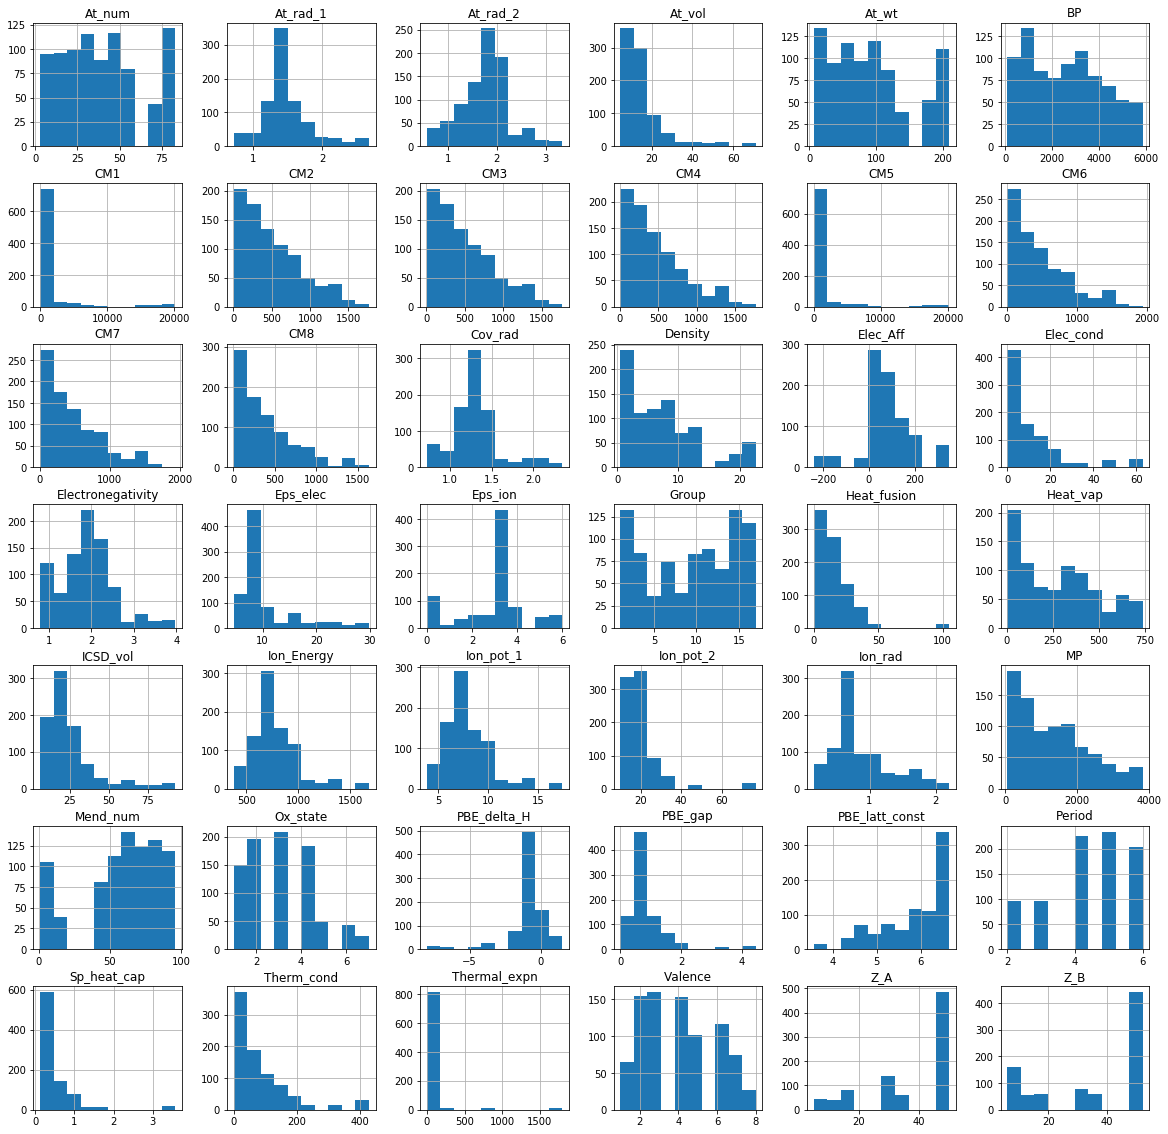

In [164]:
df_descrip.hist(figsize=(20,20))
plt.show()

In [ ]:
gb = df.groupby('Type')
gb.first()

In [ ]:
gb.get_group('IV-IV')

In [ ]:
gb.get_group('III-V')

In [ ]:
gb.get_group('II-VI')

-----------------
---------------

# New dataframes
- ``df``: original dataframe, nothing changed
- ``df_copy``: Low correlation dataframe (dropping descriptors columns that have very low correlation with predicted values)
- ``df_newcopy`` : Low correlation dataframe AND removing outliers (dropping columns that have formation energies above 10 eV)
- ``df_nooutliers`` : original data frame AND removing outliers (dropping columns that have formation energies above 10 eV)
- ``df_onehot`` : original data frame with the categorical numerical values one-hot encoded

In [136]:
df_copy = df.copy()

#### ``df_copy``: Dropping columns that have very low correlation with predicted values.
- valence
- period
- group
- oxidation state
- atomic number
- atomic weight
- mend num (??)

In [22]:
df_copy.drop(['Valence', 'Period', 'Group', 'Ox_state', 'At_num', 'At_wt', 'Mend_num'], axis=1, inplace=True)

In [24]:
df_copy

,Type,AB,Site,Impurity,∆H (A-rich),∆H (B-rich),(+2/+1),(+1/0),(0/-1),(-1/-2),Z_A,Z_B,PBE_delta_H,PBE_latt_const,PBE_gap,Eps_elec,Eps_ion,CM1,CM2,CM3,CM4,CM5,CM6,CM7,CM8,Ion_rad,BP,MP,Density,ICSD_vol,Cov_rad,Ion_Energy,At_rad_1,Elec_Aff,At_rad_2,At_vol,Ion_pot_1,Ion_pot_2,Thermal_expn,Sp_heat_cap,Therm_cond,Elec_cond,Heat_fusion,Heat_vap,Electronegativity
0,IV-IV,SiC,M_i_A,In,15.962579,15.962579,3.891344,4.660228,5.108776,5.628670,14,6,-0.42,4.25,1.27,18.06,2.27,373.01,373.01,373.01,373.01,138.44,138.44,138.44,79.93,0.80,2350.0,429.78,7.31,26.1,1.44,558.3,1.66,29.0,2.00,15.70,5.79,18.87,32.1,0.23,81.60,3.4,3.26,226.34,1.78
1,IV-IV,SiC,M_i_B,La,19.971847,19.554390,3.863351,4.538656,4.991232,5.555708,14,6,-0.42,4.25,1.27,18.06,2.27,375.78,375.78,375.78,216.96,185.96,185.96,185.96,185.96,1.16,3737.0,1191.00,6.15,37.4,1.25,538.1,1.88,50.0,2.74,20.73,5.58,11.06,5.2,0.19,13.50,1.9,11.30,399.57,1.10
2,IV-IV,SiC,M_i_neut,Zn,7.156721,7.156721,3.206206,4.244346,4.734064,5.363217,14,6,-0.42,4.25,1.27,18.06,2.27,152.25,238.53,238.53,238.53,102.23,102.23,102.23,65.25,0.74,1180.0,692.73,7.13,15.1,1.25,906.4,1.33,0.0,1.53,9.20,9.39,17.96,30.2,0.39,116.00,16.9,7.38,115.30,1.65
3,IV-IV,SiC,M_i_B,Al,6.950529,7.109779,3.502748,4.242487,4.649842,5.319256,14,6,-0.42,4.25,1.27,18.06,2.27,85.70,85.70,85.70,49.48,42.41,42.41,42.41,42.41,0.54,2740.0,933.50,2.70,16.6,1.18,577.6,1.43,45.0,1.62,10.00,5.99,18.83,23.1,0.90,237.00,37.7,10.70,290.80,1.61
4,IV-IV,SiC,M_B,I,8.783475,9.200933,3.614499,4.220773,5.057632,5.608287,14,6,-0.42,4.25,1.27,18.06,2.27,403.46,403.46,403.46,403.46,6874.36,105.89,105.89,105.89,2.20,457.5,386.70,4.93,42.5,1.33,1008.4,1.33,295.3,1.32,25.74,10.45,19.13,87.0,0.14,0.45,0.0,7.76,20.90,2.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,IV-IV,SnC,M_A,Cr,-1.598407,0.946053,-2.750073,-2.404091,-1.048124,-0.520923,50,6,1.51,5.09,0.62,10.71,5.61,1026.78,333.57,333.57,333.57,65.37,65.37,65.37,65.37,0.62,2945.0,2130.00,7.19,12.0,1.18,652.8,1.25,64.0,1.85,7.23,6.77,16.50,4.9,0.45,93.70,7.9,20.00,339.50,1.66
849,IV-IV,SnC,M_A,Pb,1.461677,7.276597,-2.901850,-2.440133,-0.729618,-0.075188,50,6,1.51,5.09,0.62,10.71,5.61,19594.01,1139.70,1139.70,1139.70,223.33,223.33,223.33,223.33,1.19,2023.0,600.65,11.35,30.3,1.47,715.5,1.75,110.0,1.81,18.17,7.42,15.03,28.8,0.13,35.30,4.8,4.77,177.90,2.33
850,III-V,GaN,M_B,P,1.920718,8.669929,-3.098571,-2.446655,0.473968,1.434063,31,7,-6.13,4.55,1.55,15.00,0.26,236.11,236.11,236.11,236.11,332.34,32.65,32.65,32.65,0.17,553.0,317.30,1.82,18.9,1.06,1011.7,1.28,71.7,1.23,17.00,10.49,19.73,127.0,0.77,0.23,0.0,0.63,12.40,2.19
851,III-V,GaN,M_A,Tl,3.862552,-2.269993,-3.297060,-2.634126,0.266647,1.270077,31,7,-6.13,4.55,1.55,15.00,0.26,19025.41,780.76,780.76,780.76,287.90,287.90,287.90,287.90,1.59,1746.0,577.00,11.85,28.5,1.48,589.3,1.71,30.0,2.08,17.20,6.11,20.43,29.9,0.13,46.10,5.6,4.27,162.09,2.04


In [104]:
type_counter(df_copy)

Total entries:  853
II-VI: 506, 59.32%
III-V: 155, 18.17%
IV-IV: 192, 22.51%


#### ``df_newcopy`` : Low correlation dataframe AND removing outliers
dropping columns that have formation energies above 10 eV

In [23]:
df_newcopy = df_copy[(df_copy['∆H (A-rich)'] <= 10) & (df_copy['∆H (B-rich)'] <= 10)]
df_newcopy

,Type,AB,Site,Impurity,∆H (A-rich),∆H (B-rich),(+2/+1),(+1/0),(0/-1),(-1/-2),Z_A,Z_B,PBE_delta_H,PBE_latt_const,PBE_gap,Eps_elec,Eps_ion,CM1,CM2,CM3,CM4,CM5,CM6,CM7,CM8,Ion_rad,BP,MP,Density,ICSD_vol,Cov_rad,Ion_Energy,At_rad_1,Elec_Aff,At_rad_2,At_vol,Ion_pot_1,Ion_pot_2,Thermal_expn,Sp_heat_cap,Therm_cond,Elec_cond,Heat_fusion,Heat_vap,Electronegativity
2,IV-IV,SiC,M_i_neut,Zn,7.156721,7.156721,3.206206,4.244346,4.734064,5.363217,14,6,-0.42,4.25,1.27,18.06,2.27,152.25,238.53,238.53,238.53,102.23,102.23,102.23,65.25,0.74,1180.0,692.73,7.13,15.1,1.25,906.4,1.33,0.0,1.53,9.20,9.39,17.96,30.2,0.39,116.00,16.9,7.38,115.30,1.65
3,IV-IV,SiC,M_i_B,Al,6.950529,7.109779,3.502748,4.242487,4.649842,5.319256,14,6,-0.42,4.25,1.27,18.06,2.27,85.70,85.70,85.70,49.48,42.41,42.41,42.41,42.41,0.54,2740.0,933.50,2.70,16.6,1.18,577.6,1.43,45.0,1.62,10.00,5.99,18.83,23.1,0.90,237.00,37.7,10.70,290.80,1.61
4,IV-IV,SiC,M_B,I,8.783475,9.200933,3.614499,4.220773,5.057632,5.608287,14,6,-0.42,4.25,1.27,18.06,2.27,403.46,403.46,403.46,403.46,6874.36,105.89,105.89,105.89,2.20,457.5,386.70,4.93,42.5,1.33,1008.4,1.33,295.3,1.32,25.74,10.45,19.13,87.0,0.14,0.45,0.0,7.76,20.90,2.66
5,IV-IV,SiC,M_i_A,Ru,9.266514,8.849056,3.336793,4.219286,4.660660,5.267393,14,6,-0.42,4.25,1.27,18.06,2.27,334.95,334.95,334.95,334.95,124.32,124.32,124.32,71.77,0.62,4425.0,2610.00,12.37,14.0,1.25,711.0,1.32,110.0,1.89,8.30,7.37,16.76,6.4,0.24,117.00,14.9,25.52,567.77,2.20
7,IV-IV,SiC,M_B,Rh,5.273336,5.273336,1.660711,4.106883,4.695697,5.273310,14,6,-0.42,4.25,1.27,18.06,2.27,342.56,342.56,342.56,342.56,4641.73,89.90,89.90,89.90,0.67,3970.0,2236.00,12.41,11.5,1.25,720.0,1.34,120.0,1.83,8.30,7.46,18.08,8.2,0.24,150.00,23.0,21.76,495.39,2.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,IV-IV,SnC,M_A,Cr,-1.598407,0.946053,-2.750073,-2.404091,-1.048124,-0.520923,50,6,1.51,5.09,0.62,10.71,5.61,1026.78,333.57,333.57,333.57,65.37,65.37,65.37,65.37,0.62,2945.0,2130.00,7.19,12.0,1.18,652.8,1.25,64.0,1.85,7.23,6.77,16.50,4.9,0.45,93.70,7.9,20.00,339.50,1.66
849,IV-IV,SnC,M_A,Pb,1.461677,7.276597,-2.901850,-2.440133,-0.729618,-0.075188,50,6,1.51,5.09,0.62,10.71,5.61,19594.01,1139.70,1139.70,1139.70,223.33,223.33,223.33,223.33,1.19,2023.0,600.65,11.35,30.3,1.47,715.5,1.75,110.0,1.81,18.17,7.42,15.03,28.8,0.13,35.30,4.8,4.77,177.90,2.33
850,III-V,GaN,M_B,P,1.920718,8.669929,-3.098571,-2.446655,0.473968,1.434063,31,7,-6.13,4.55,1.55,15.00,0.26,236.11,236.11,236.11,236.11,332.34,32.65,32.65,32.65,0.17,553.0,317.30,1.82,18.9,1.06,1011.7,1.28,71.7,1.23,17.00,10.49,19.73,127.0,0.77,0.23,0.0,0.63,12.40,2.19
851,III-V,GaN,M_A,Tl,3.862552,-2.269993,-3.297060,-2.634126,0.266647,1.270077,31,7,-6.13,4.55,1.55,15.00,0.26,19025.41,780.76,780.76,780.76,287.90,287.90,287.90,287.90,1.59,1746.0,577.00,11.85,28.5,1.48,589.3,1.71,30.0,2.08,17.20,6.11,20.43,29.9,0.13,46.10,5.6,4.27,162.09,2.04


In [105]:
type_counter(df_newcopy)

Total entries:  766
II-VI: 482, 62.92%
III-V: 130, 16.97%
IV-IV: 154, 20.1%


#### ``df_nooutliers`` : original data frame ONLY removing outliers 
dropping columns that have formation energies above 10 eV

In [112]:
df_nooutliers = df[(df['∆H (A-rich)'] <= 10) & (df['∆H (B-rich)'] <= 10)]
df_nooutliers

,Type,AB,Site,Impurity,∆H (A-rich),∆H (B-rich),(+2/+1),(+1/0),(0/-1),(-1/-2),Z_A,Z_B,PBE_delta_H,PBE_latt_const,PBE_gap,Eps_elec,Eps_ion,CM1,CM2,CM3,CM4,CM5,CM6,CM7,CM8,Ion_rad,BP,MP,Density,At_wt,ICSD_vol,Cov_rad,Ion_Energy,At_rad_1,Elec_Aff,At_rad_2,At_vol,Mend_num,Ion_pot_1,Ion_pot_2,Thermal_expn,Sp_heat_cap,Therm_cond,Elec_cond,Heat_fusion,Heat_vap,Electronegativity,At_num,Period,Group,Valence,Ox_state
2,IV-IV,SiC,M_i_neut,Zn,7.156721,7.156721,3.206206,4.244346,4.734064,5.363217,14,6,-0.42,4.25,1.27,18.06,2.27,152.25,238.53,238.53,238.53,102.23,102.23,102.23,65.25,0.74,1180.0,692.73,7.13,65.39,15.1,1.25,906.4,1.33,0.0,1.53,9.20,69,9.39,17.96,30.2,0.39,116.00,16.9,7.38,115.30,1.65,30,4,12,2,2
3,IV-IV,SiC,M_i_B,Al,6.950529,7.109779,3.502748,4.242487,4.649842,5.319256,14,6,-0.42,4.25,1.27,18.06,2.27,85.70,85.70,85.70,49.48,42.41,42.41,42.41,42.41,0.54,2740.0,933.50,2.70,26.98,16.6,1.18,577.6,1.43,45.0,1.62,10.00,73,5.99,18.83,23.1,0.90,237.00,37.7,10.70,290.80,1.61,13,3,13,3,3
4,IV-IV,SiC,M_B,I,8.783475,9.200933,3.614499,4.220773,5.057632,5.608287,14,6,-0.42,4.25,1.27,18.06,2.27,403.46,403.46,403.46,403.46,6874.36,105.89,105.89,105.89,2.20,457.5,386.70,4.93,126.90,42.5,1.33,1008.4,1.33,295.3,1.32,25.74,96,10.45,19.13,87.0,0.14,0.45,0.0,7.76,20.90,2.66,53,5,17,7,1
5,IV-IV,SiC,M_i_A,Ru,9.266514,8.849056,3.336793,4.219286,4.660660,5.267393,14,6,-0.42,4.25,1.27,18.06,2.27,334.95,334.95,334.95,334.95,124.32,124.32,124.32,71.77,0.62,4425.0,2610.00,12.37,101.07,14.0,1.25,711.0,1.32,110.0,1.89,8.30,56,7.37,16.76,6.4,0.24,117.00,14.9,25.52,567.77,2.20,44,5,8,8,3
7,IV-IV,SiC,M_B,Rh,5.273336,5.273336,1.660711,4.106883,4.695697,5.273310,14,6,-0.42,4.25,1.27,18.06,2.27,342.56,342.56,342.56,342.56,4641.73,89.90,89.90,89.90,0.67,3970.0,2236.00,12.41,102.91,11.5,1.25,720.0,1.34,120.0,1.83,8.30,59,7.46,18.08,8.2,0.24,150.00,23.0,21.76,495.39,2.28,45,5,9,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,IV-IV,SnC,M_A,Cr,-1.598407,0.946053,-2.750073,-2.404091,-1.048124,-0.520923,50,6,1.51,5.09,0.62,10.71,5.61,1026.78,333.57,333.57,333.57,65.37,65.37,65.37,65.37,0.62,2945.0,2130.00,7.19,52.00,12.0,1.18,652.8,1.25,64.0,1.85,7.23,49,6.77,16.50,4.9,0.45,93.70,7.9,20.00,339.50,1.66,24,4,6,6,3
849,IV-IV,SnC,M_A,Pb,1.461677,7.276597,-2.901850,-2.440133,-0.729618,-0.075188,50,6,1.51,5.09,0.62,10.71,5.61,19594.01,1139.70,1139.70,1139.70,223.33,223.33,223.33,223.33,1.19,2023.0,600.65,11.35,207.20,30.3,1.47,715.5,1.75,110.0,1.81,18.17,81,7.42,15.03,28.8,0.13,35.30,4.8,4.77,177.90,2.33,82,6,14,4,2
850,III-V,GaN,M_B,P,1.920718,8.669929,-3.098571,-2.446655,0.473968,1.434063,31,7,-6.13,4.55,1.55,15.00,0.26,236.11,236.11,236.11,236.11,332.34,32.65,32.65,32.65,0.17,553.0,317.30,1.82,30.97,18.9,1.06,1011.7,1.28,71.7,1.23,17.00,83,10.49,19.73,127.0,0.77,0.23,0.0,0.63,12.40,2.19,15,3,15,5,5
851,III-V,GaN,M_A,Tl,3.862552,-2.269993,-3.297060,-2.634126,0.266647,1.270077,31,7,-6.13,4.55,1.55,15.00,0.26,19025.41,780.76,780.76,780.76,287.90,287.90,287.90,287.90,1.59,1746.0,577.00,11.85,204.38,28.5,1.48,589.3,1.71,30.0,2.08,17.20,76,6.11,20.43,29.9,0.13,46.10,5.6,4.27,162.09,2.04,81,6,13,3,1


In [165]:
type_counter(df_nooutliers)

Total entries:  766
II-VI: 482, 62.92%
III-V: 130, 16.97%
IV-IV: 154, 20.1%


#### ``df_onehot`` : original dataframe with numerical categorical descriptors one-hot encoded
- descriptors that are numerically categorical are: 'Z_A', 'Z_B', 'Mend_num', 'At_num', 'Period', 'Group', 'Valence', 'Ox_state'

In [230]:
cat_descrip = list(df.select_dtypes(include='int').columns)
cat_descrip

['Z_A', 'Z_B', 'Mend_num', 'At_num', 'Period', 'Group', 'Valence', 'Ox_state']

In [233]:
df_onehot = pd.get_dummies(df, columns=cat_descrip)
print(df_onehot.shape)
df_onehot.head()

(853, 229)


,Type,AB,Site,Impurity,∆H (A-rich),∆H (B-rich),(+2/+1),(+1/0),(0/-1),(-1/-2),PBE_delta_H,PBE_latt_const,PBE_gap,Eps_elec,Eps_ion,CM1,CM2,CM3,CM4,CM5,CM6,CM7,CM8,Ion_rad,BP,MP,Density,At_wt,ICSD_vol,Cov_rad,Ion_Energy,At_rad_1,Elec_Aff,At_rad_2,At_vol,Ion_pot_1,Ion_pot_2,Thermal_expn,Sp_heat_cap,Therm_cond,Elec_cond,Heat_fusion,Heat_vap,Electronegativity,Z_A_5,Z_A_6,Z_A_13,Z_A_14,Z_A_30,Z_A_31,Z_A_32,Z_A_48,Z_A_49,Z_A_50,Z_B_6,Z_B_7,Z_B_8,Z_B_14,Z_B_15,Z_B_16,Z_B_32,Z_B_33,Z_B_34,Z_B_50,Z_B_51,Z_B_52,Mend_num_1,Mend_num_2,Mend_num_3,Mend_num_4,Mend_num_5,Mend_num_7,Mend_num_8,Mend_num_9,Mend_num_11,Mend_num_12,Mend_num_13,Mend_num_43,Mend_num_44,Mend_num_45,Mend_num_46,Mend_num_47,Mend_num_48,Mend_num_49,Mend_num_50,Mend_num_51,Mend_num_52,Mend_num_53,Mend_num_54,Mend_num_55,Mend_num_56,Mend_num_57,Mend_num_58,Mend_num_59,Mend_num_60,Mend_num_61,Mend_num_62,Mend_num_63,Mend_num_64,Mend_num_65,Mend_num_66,Mend_num_67,Mend_num_68,Mend_num_69,Mend_num_70,Mend_num_71,Mend_num_72,Mend_num_73,Mend_num_74,Mend_num_75,Mend_num_76,Mend_num_77,Mend_num_78,Mend_num_79,Mend_num_80,Mend_num_81,Mend_num_82,Mend_num_83,Mend_num_84,Mend_num_85,Mend_num_86,Mend_num_87,Mend_num_88,Mend_num_89,Mend_num_90,Mend_num_93,Mend_num_94,Mend_num_95,Mend_num_96,At_num_3,At_num_4,At_num_5,At_num_6,At_num_7,At_num_8,At_num_9,At_num_11,At_num_12,At_num_13,At_num_14,At_num_15,At_num_16,At_num_17,At_num_19,At_num_20,At_num_21,At_num_22,At_num_23,At_num_24,At_num_25,At_num_26,At_num_27,At_num_28,At_num_29,At_num_30,At_num_31,At_num_32,At_num_33,At_num_34,At_num_35,At_num_37,At_num_38,At_num_39,At_num_40,At_num_41,At_num_42,At_num_43,At_num_44,At_num_45,At_num_46,At_num_47,At_num_48,At_num_49,At_num_50,At_num_51,At_num_52,At_num_53,At_num_55,At_num_56,At_num_57,At_num_72,At_num_73,At_num_74,At_num_75,At_num_76,At_num_77,At_num_78,At_num_79,At_num_80,At_num_81,At_num_82,At_num_83,Period_2,Period_3,Period_4,Period_5,Period_6,Group_1,Group_2,Group_3,Group_4,Group_5,Group_6,Group_7,Group_8,Group_9,Group_10,Group_11,Group_12,Group_13,Group_14,Group_15,Group_16,Group_17,Valence_1,Valence_2,Valence_3,Valence_4,Valence_5,Valence_6,Valence_7,Valence_8,Ox_state_1,Ox_state_2,Ox_state_3,Ox_state_4,Ox_state_5,Ox_state_6,Ox_state_7
0,IV-IV,SiC,M_i_A,In,15.962579,15.962579,3.891344,4.660228,5.108776,5.628670,-0.42,4.25,1.27,18.06,2.27,373.01,373.01,373.01,373.01,138.44,138.44,138.44,79.93,0.80,2350.0,429.78,7.31,114.82,26.1,1.44,558.3,1.66,29.0,2.00,15.70,5.79,18.87,32.1,0.23,81.60,3.4,3.26,226.34,1.78,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,IV-IV,SiC,M_i_B,La,19.971847,19.554390,3.863351,4.538656,4.991232,5.555708,-0.42,4.25,1.27,18.06,2.27,375.78,375.78,375.78,216.96,185.96,185.96,185.96,185.96,1.16,3737.0,1191.00,6.15,138.91,37.4,1.25,538.1,1.88,50.0,2.74,20.73,5.58,11.06,5.2,0.19,13.50,1.9,11.30,399.57,1.10,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,IV-IV,SiC,M_i_neut,Zn,7.156721,7.156721,3.206206,4.244346,4.734064,5.363217,-0.42,4.25,1.27,18.06,2.27,152.25,238.53,238.53,238.53,102.23,102.23,102.23,65.25,0.74,1180.0,692.73,7.13,65.39,15.1,1.25,906.4,1.33,0.0,1.53,9.20,9.39,17.96,30.2,0.39,116.00,16.9,7.38,115.30,1.65,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

# Random Forest Modeling
- different descriptors
- removing outliers
- one-hot encoding

#### Function to compute RMSE of model

In [228]:
def RFR(df, o_start=4, o_end=10):
    '''
    o_start: int. column index of target value. (4 is the beginning)
    o_end: int. column index of target value. (10 is the end)
    '''
    descriptors = df.columns[10:]
    output = df.columns[o_start:o_end]
    train,test = train_test_split(df,test_size=0.22, random_state=130)
    clf = RandomForestRegressor(n_jobs=2, random_state=130)
    
    frames_list = []
    train_rmse_list = [] 
    test_rmse_list = []
    
    for o in output:
        clf.fit(train[descriptors], train[o])

        trainpred = clf.predict(train[descriptors])
        testpred = clf.predict(test[descriptors])
        
        train_rmse = mean_squared_error(train[o],trainpred, squared=False)
        test_rmse = mean_squared_error(test[o],testpred, squared=False)
        
        train_rmse_list.append(train_rmse)
        test_rmse_list.append(test_rmse)

        #parity plot 
        plt.figure(figsize=(4,4))
        plt.scatter(train[o],trainpred, label='train')
        plt.scatter(test[o],testpred,color='r', label='test')
        plt.xlabel('train/test data')
        plt.ylabel('predicted train/test')
        plt.plot([train[o].min(),train[o].max()],[trainpred.min(),trainpred.max()],lw=4,color='black')
        plt.title(o)
        plt.legend()
        plt.show()

        #print("Train RMSE", train_rmse)
        #print("Test RMSE", test_rmse)

        descrip_importance = list(zip(train[descriptors], clf.feature_importances_))
        descr_df = pd.DataFrame(descrip_importance, columns =['predictor', o])
        frames_list.append(descr_df)
        #print(descr_df)
    
    print('Best params:', clf.get_params)
    
    d = {'output': output, 'train rmse': train_rmse_list, 'test rmse': test_rmse_list}
    
    rmse_df = pd.DataFrame(data=d)

    result = pd.concat(frames_list, axis=1)
    result.drop(['predictor'], axis=1, inplace=True)
    result.insert(0, 'predictor', descriptors)
    
    result.set_index('predictor', inplace=True)
    
    plt.figure(figsize=(12,8))
    plt.title('Descriptor Importance in RFR model')
    sns.heatmap(result, annot=True, cmap='Oranges')
    plt.show()
    
    return rmse_df

### No tuning of descriptors (``df``)

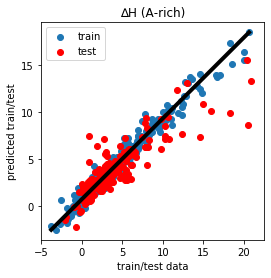

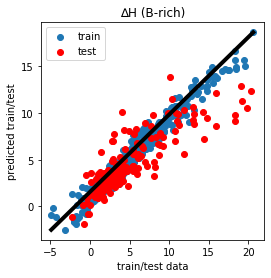

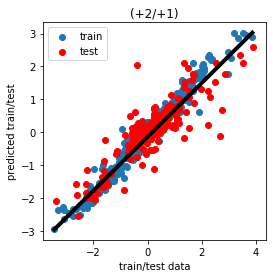

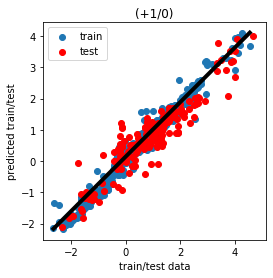

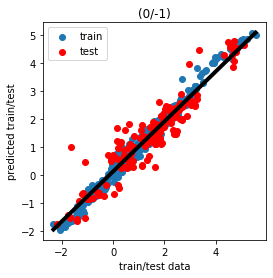

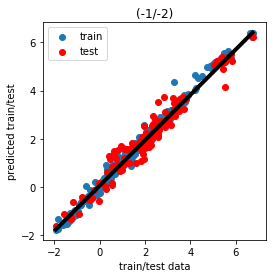

Best params: <bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=2, oob_score=False,
                      random_state=130, verbose=0, warm_start=False)>


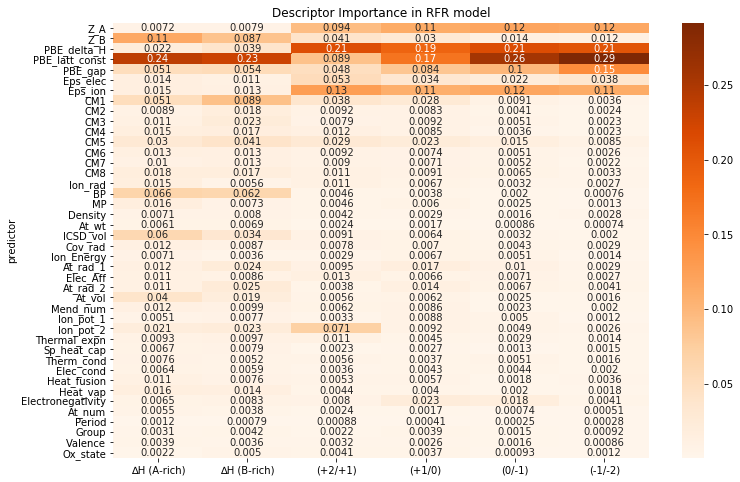

,output,train rmse,test rmse
0,∆H (A-rich),0.683523,2.018260
1,∆H (B-rich),0.854002,2.451177
2,(+2/+1),0.214799,0.608139
3,(+1/0),0.219321,0.522942
4,(0/-1),0.162004,0.507439
5,(-1/-2),0.135858,0.328704


In [176]:
RFR(df)

### One-hot encoding of numerical descriptors - ``df_onehot``
**This makes very little difference in the performance of the model**

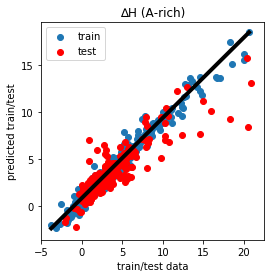

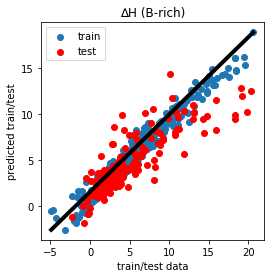

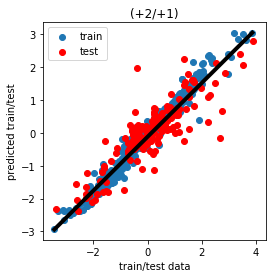

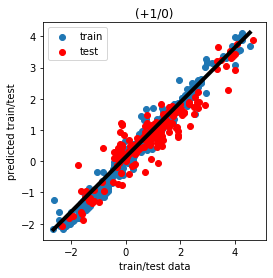

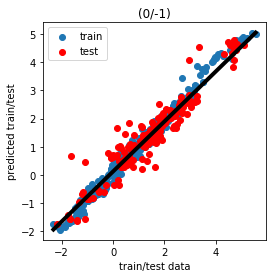

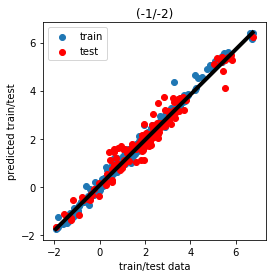

Best params: <bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=2, oob_score=False,
                      random_state=130, verbose=0, warm_start=False)>


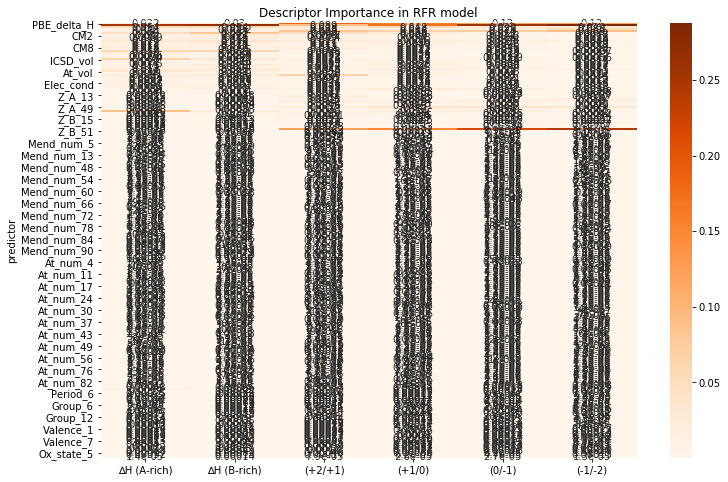

,output,train rmse,test rmse
0,∆H (A-rich),0.691133,2.029953
1,∆H (B-rich),0.876976,2.423567
2,(+2/+1),0.222138,0.613194
3,(+1/0),0.216731,0.522456
4,(0/-1),0.158365,0.474847
5,(-1/-2),0.132380,0.326965


In [229]:
RFR(df_onehot)

### Removed entries with formation energy greater than 10 eV - ``df_nooutliers``:
**This made a large difference in the performance of the model to predict the formation enthalpies**

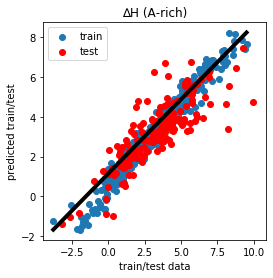

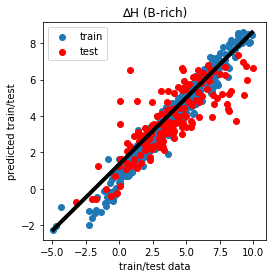

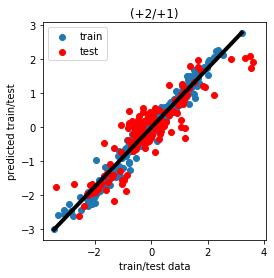

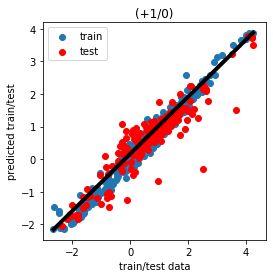

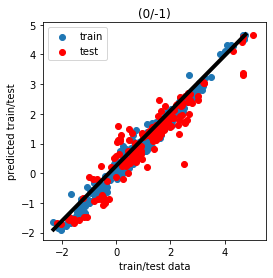

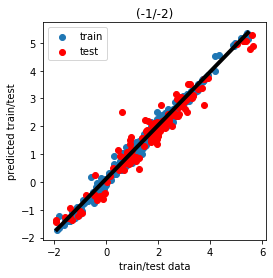

Best params: <bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=2, oob_score=False,
                      random_state=130, verbose=0, warm_start=False)>


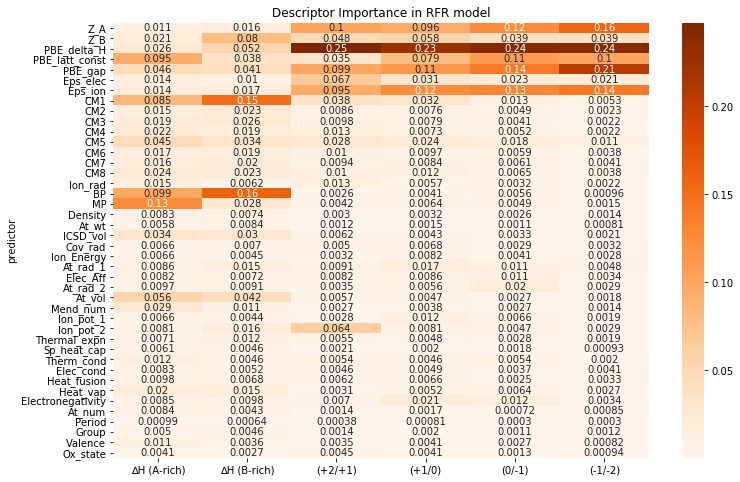

,output,train rmse,test rmse
0,∆H (A-rich),0.482355,1.259348
1,∆H (B-rich),0.567460,1.519628
2,(+2/+1),0.179011,0.533859
3,(+1/0),0.188701,0.513070
4,(0/-1),0.169284,0.461905
5,(-1/-2),0.129970,0.323699


In [177]:
RFR(df_nooutliers)

### Removed descriptors with the least amount of correlation- ``df_copy``. Determined by:
- the historgram plots that showed no correlation in any direction (ie no trend)
- had an "importance" of < 0.01

**This made very little difference in the performance of the model**

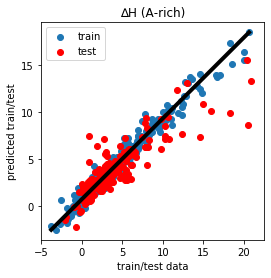

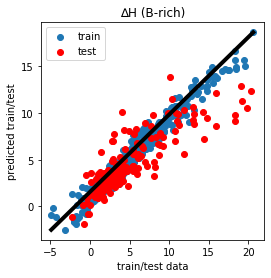

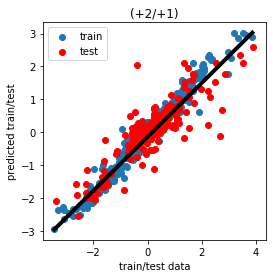

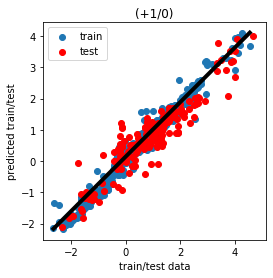

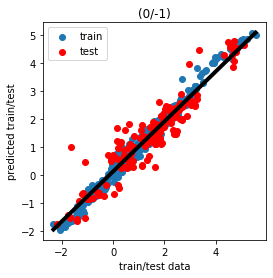

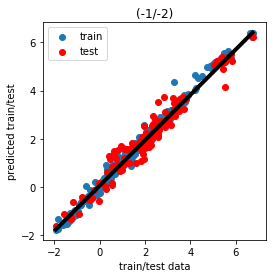

Best params: <bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=2, oob_score=False,
                      random_state=130, verbose=0, warm_start=False)>


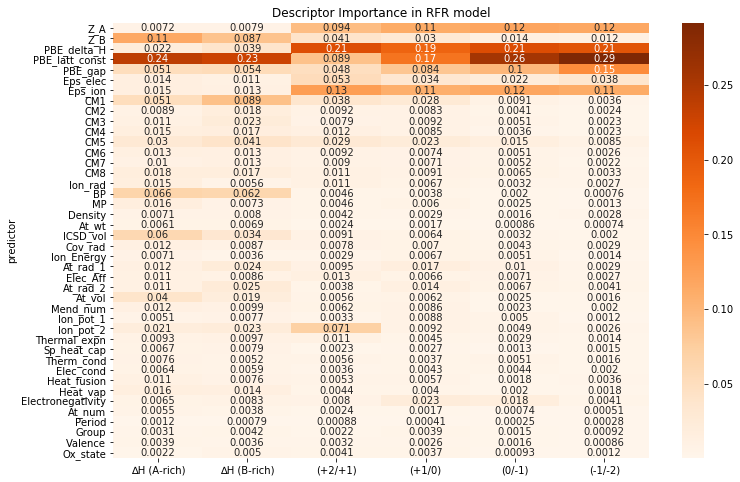

,output,train rmse,test rmse
0,∆H (A-rich),0.683523,2.018260
1,∆H (B-rich),0.854002,2.451177
2,(+2/+1),0.214799,0.608139
3,(+1/0),0.219321,0.522942
4,(0/-1),0.162004,0.507439
5,(-1/-2),0.135858,0.328704


In [178]:
RFR(df_copy)

### Removed entries from ``df_copy`` that had formation energy greater than 10 eV - ``df_newcopy``:
**This made a large difference in the performance of the model, similar to just removing outliers from og dataframe**

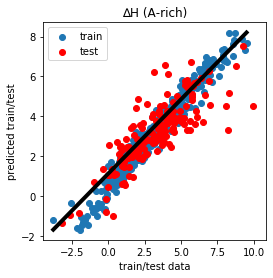

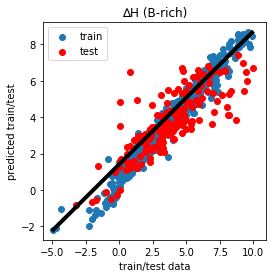

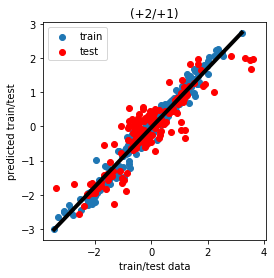

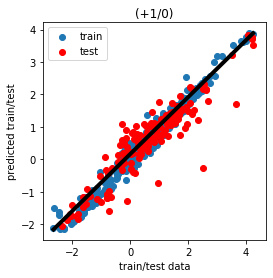

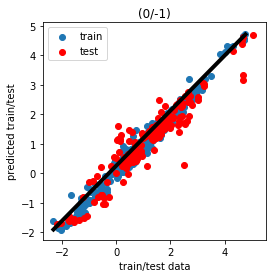

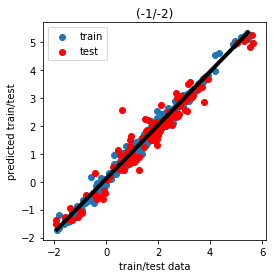

Best params: <bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=2, oob_score=False,
                      random_state=130, verbose=0, warm_start=False)>


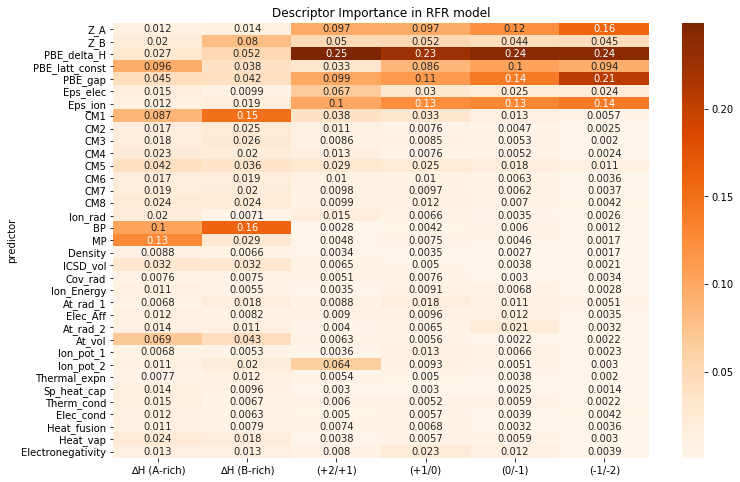

,output,train rmse,test rmse
0,∆H (A-rich),0.484411,1.285502
1,∆H (B-rich),0.570935,1.522478
2,(+2/+1),0.179928,0.542089
3,(+1/0),0.189089,0.515376
4,(0/-1),0.166528,0.464314
5,(-1/-2),0.130922,0.323178


In [179]:
RFR(df_newcopy)

# Hyperparameter Tuning
- We are looking to optimize the parameters of the RFR to optimize the prediction.

### Random hyperparameter grid
Create a grid of the parameter space we want to explore. For RFR the most important parameters are:
- n_estimators: number of trees in the forest 
- max_depth: number of leaves in each decision tree
- min_sammples_split: minimum number of datapoints in a node before the node splits
- min_samples_leaf: minimum number of data points allowed in a leaf node

In [41]:
def RSCV_grid():

    # Number of trees in random forest
    n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1500, num = 15)]

    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(0, 50, num = 10)]
    max_depth.append(None)

    # Minimum number of samples required to split a node
    min_samples_split = [2, 5, 10]

    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 4]

    # Create the random grid
    random_grid = {'n_estimators': n_estimators,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf}
    return random_grid

In [42]:
RSCV_grid()

{'n_estimators': [100,
  200,
  300,
  400,
  500,
  600,
  700,
  800,
  900,
  1000,
  1100,
  1200,
  1300,
  1400,
  1500],
 'max_depth': [0, 5, 11, 16, 22, 27, 33, 38, 44, 50, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4]}

### Random Search Training
``RandomizedSearchCV``: randomized search on hyper parameters. Important arguements to set are n_iter and cv.
- n_iter: number of different combinations to try
- cv: number of folds to use for cross validation
In this example the model is going to ty 100 different combinations from the random grid, wih a 5-fold cross validation (ie 500 combinations).

Similar to other scikit-learn models:
- initiate the model (random search) with ``RandomizedSearchCV``
- fit the model

In [134]:
RESULTS = {}
def RFR_optimized(df):
    descriptors = df.columns[10:]
    output = df.columns[4:10]
    train,test = train_test_split(df,test_size=0.22, random_state=130)
    
    clf = RandomForestRegressor()
    
    random_grid = RSCV_grid()
    
    frames_list = []
    train_rmse_list = [] 
    test_rmse_list = []
    
    for o in output:
        clf_random = RESULTS.get(o)
        if clf_random is None:
            clf_random = RandomizedSearchCV(estimator=clf, param_distributions=random_grid,
                               n_iter=100, cv=5, verbose=2, random_state=130, n_jobs=-1 )
            RESULTS[o] = clf_random

        clf_random.fit(train[descriptors], train[o])

        trainpred = clf_random.best_estimator_.predict(train[descriptors])
        testpred = clf_random.best_estimator_.predict(test[descriptors])
        
        train_rmse = mean_squared_error(train[o],trainpred, squared=False)
        test_rmse = mean_squared_error(test[o],testpred, squared=False)
        
        train_rmse_list.append(train_rmse)
        test_rmse_list.append(test_rmse)

        plt.figure(figsize=(4,4))
        plt.scatter(train[o],trainpred, label='train')
        plt.scatter(test[o],testpred,color='r', label='test')
        plt.xlabel('train/test data')
        plt.ylabel('predicted train/test')
        plt.plot([train[o].min(),train[o].max()],[trainpred.min(),trainpred.max()],lw=4,color='black')
        plt.title(o)
        plt.legend()
        plt.show()

        print("Train RMSE", train_rmse)
        print("Test RMSE", test_rmse)
        print('Best params:', clf_random.best_params_)

        descrip_importance = list(zip(train[descriptors], clf_random.best_estimator_.feature_importances_))
        descr_df = pd.DataFrame(descrip_importance, columns =['predictor', o])
        frames_list.append(descr_df)
    
    d = {'output': output, 'train rmse': train_rmse_list, 'test rmse': test_rmse_list}
    
    rmse_df = pd.DataFrame(data=d)

    result = pd.concat(frames_list, axis=1)
    result.drop(['predictor'], axis=1, inplace=True)
    result.insert(0, 'predictor', descriptors)
    
    result.set_index('predictor', inplace=True)
    
    plt.figure(figsize=(12,8))
    sns.heatmap(result, annot=True, cmap='Oranges')
    plt.show()
    
    return rmse_df

### Hyper parameter tuning with ``df_nooutliers`` (all descriptors, outliers removed)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   31.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  8.6min finished


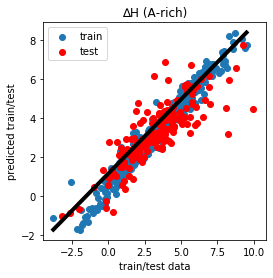

Train RMSE 0.48513786470488135
Test RMSE 1.2539367074490453
Best params: {'n_estimators': 700, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 27}
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  7.6min finished


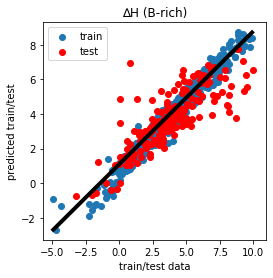

Train RMSE 0.5578263029041838
Test RMSE 1.532841965648391
Best params: {'n_estimators': 1100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 44}
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  8.2min finished


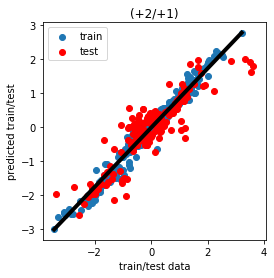

Train RMSE 0.1780444148254704
Test RMSE 0.5405831483022103
Best params: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   23.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  8.3min finished


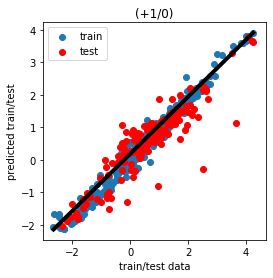

Train RMSE 0.18505213785195096
Test RMSE 0.527087516321255
Best params: {'n_estimators': 700, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 27}
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  8.4min finished


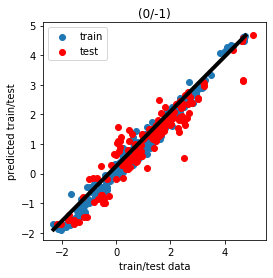

Train RMSE 0.16705517568373224
Test RMSE 0.45555253742648105
Best params: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 27}
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  9.1min finished


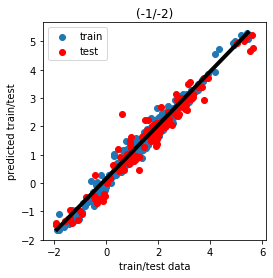

Train RMSE 0.15725891719642493
Test RMSE 0.32243453147652174
Best params: {'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 22}


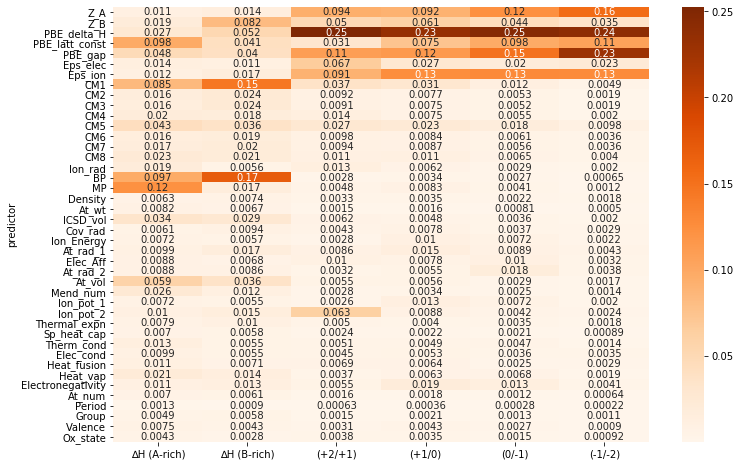

,output,train rmse,test rmse
0,∆H (A-rich),0.485138,1.253937
1,∆H (B-rich),0.557826,1.532842
2,(+2/+1),0.178044,0.540583
3,(+1/0),0.185052,0.527088
4,(0/-1),0.167055,0.455553
5,(-1/-2),0.157259,0.322435


In [135]:
RFR_optimized(df_nooutliers)

### Hyper parameter tuning with ``df_newcopy`` (low correlated descriptors removed and outliers removed)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  8.0min finished


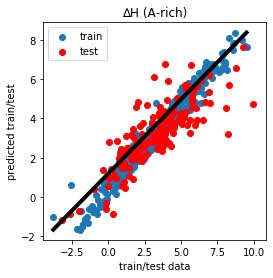

Train RMSE 0.4855317833880964
Test RMSE 1.2631350537441248
Best params: {'n_estimators': 1100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 44}
Best est: RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=44, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
Best est params: <bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=44, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_le

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  8.3min finished


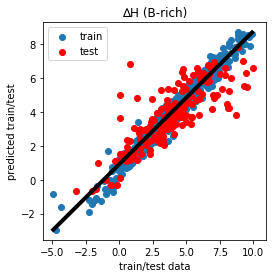

Train RMSE 0.555793652886623
Test RMSE 1.5223982686619755
Best params: {'n_estimators': 1100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 44}
Best est: RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=44, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
Best est params: <bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=44, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_lea

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  8.8min finished


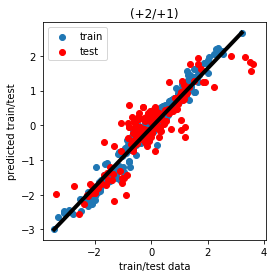

Train RMSE 0.1771267798729042
Test RMSE 0.5463098724472096
Best params: {'n_estimators': 1100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 44}
Best est: RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=44, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
Best est params: <bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=44, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_le

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  8.3min finished


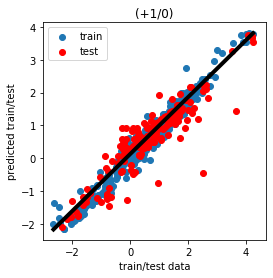

Train RMSE 0.22481177359914545
Test RMSE 0.5317942725098848
Best params: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 16}
Best est: RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=16, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
Best est params: <bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=16, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_lea

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  8.3min finished


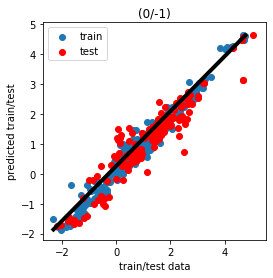

Train RMSE 0.20016881828601482
Test RMSE 0.45888143492879935
Best params: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}
Best est: RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
Best est params: <bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samp

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  8.3min finished


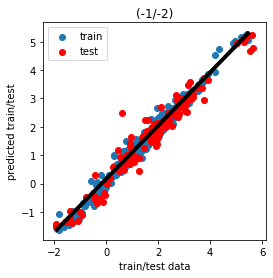

Train RMSE 0.15610412138985785
Test RMSE 0.3222296894472011
Best params: {'n_estimators': 1100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 22}
Best est: RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=22, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=1100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
Best est params: <bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=22, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_l

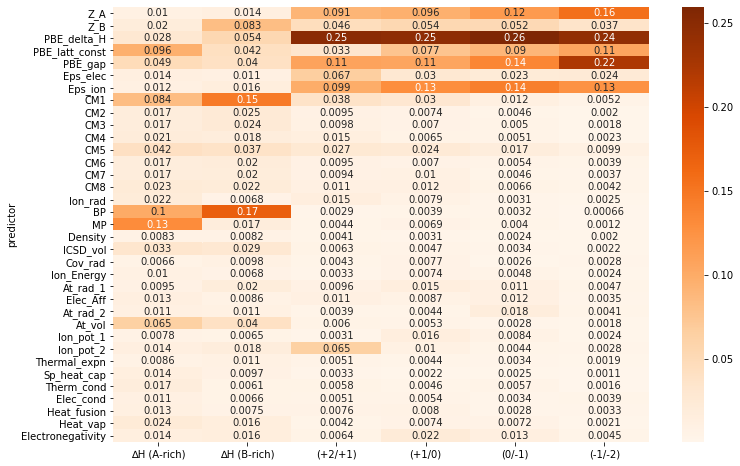

,output,train rmse,test rmse
0,∆H (A-rich),0.485532,1.263135
1,∆H (B-rich),0.555794,1.522398
2,(+2/+1),0.177127,0.546310
3,(+1/0),0.224812,0.531794
4,(0/-1),0.200169,0.458881
5,(-1/-2),0.156104,0.322230


In [66]:
RFR_optimized(df_newcopy)

---------
-------

In [125]:
def RFR_individual_opt(dataframe, column, n_est=100, min_samp_split=2, min_samp_leaf=1, max_depth=None):
    '''
    column is integer that corresponds to index in output list, ie 0 = dH-A, 1 = dH-B
    '''
    descriptors = dataframe.columns[10:]
    output = dataframe.columns[4:10] 
    o = output[column]
    train,test = train_test_split(dataframe,test_size=0.22, random_state=130)
    clf = RandomForestRegressor(n_estimators=n_est, min_samples_split=min_samp_split, min_samples_leaf=min_samp_leaf,
                                max_depth=max_depth, n_jobs=2, random_state=130)
    
    
    clf.fit(train[descriptors], train[o])

    trainpred = clf.predict(train[descriptors])
    testpred = clf.predict(test[descriptors])
        
    train_rmse = mean_squared_error(train[o],trainpred, squared=False)
    test_rmse = mean_squared_error(test[o],testpred, squared=False)
     
    plt.figure(figsize=(4,4))
    plt.scatter(train[o],trainpred, label='train')
    plt.scatter(test[o],testpred,color='r', label='test')
    plt.xlabel('train/test data')
    plt.ylabel('predicted train/test')
    plt.plot([train[o].min(),train[o].max()],[trainpred.min(),trainpred.max()],lw=4,color='black')
    plt.title(o)
    plt.legend()
    plt.show()

    print("Train RMSE", train_rmse)
    print("Test RMSE", test_rmse)
    return